# Feature Engineering

## 1. Import libraries

In [169]:
import numpy as np
# !pip install streamlit
import streamlit as st
import pandas as pd

import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import (
	OneHotEncoder,
	OrdinalEncoder,
	StandardScaler,
	MinMaxScaler,
	PowerTransformer,
	FunctionTransformer
)
from sklearn.pipeline import Pipeline
from feature_engine.encoding import RareLabelEncoder

from feature_engine.outliers import Winsorizer
from feature_engine.datetime import DatetimeFeatures
from feature_engine.selection import SelectBySingleFeaturePerformance
from feature_engine.encoding import (
	RareLabelEncoder,
	MeanEncoder,
	CountFrequencyEncoder
)

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

## 2. Display Setting

In [170]:
pd.set_option("display.max_columns", None)

In [171]:
#sklearn will return dataframe 
sklearn.set_config(transform_output= "pandas")

In [172]:
warnings.filterwarnings("ignore")

## 3. Read the data 

In [173]:
file_path = file_path = r"/Users/sudhirjoon/Library/Mobile Documents/com~apple~CloudDocs/Uni_Mannheim/Nitish/Project_4_CLASSIFICATION WITH AN ACADEMIC SUCCESS DATASET/Data/train_clean.csv"
train_clean = pd.read_csv(file_path)
train_clean.head()

,marital_status,application_mode,application_order,course,daytime/evening_attendance,previous_qualification,previous_qualification_(grade),nacionality,mother's_qualification,father's_qualification,mother's_occupation,father's_occupation,admission_grade,displaced,educational_special_needs,debtor,tuition_fees_up_to_date,gender,scholarship_holder,age_at_enrollment,international,curricular_units_1st_sem_(credited),curricular_units_1st_sem_(enrolled),curricular_units_1st_sem_(evaluations),curricular_units_1st_sem_(approved),curricular_units_1st_sem_(grade),curricular_units_1st_sem_(without_evaluations),curricular_units_2nd_sem_(credited),curricular_units_2nd_sem_(enrolled),curricular_units_2nd_sem_(evaluations),curricular_units_2nd_sem_(approved),curricular_units_2nd_sem_(grade),curricular_units_2nd_sem_(without_evaluations),unemployment_rate,inflation_rate,gdp,target
0,1,44,1,9085,1,39,150.0,1,37,37,9,8,150.0,1,0,0,1,0,1,21,0,1,6,8,6,12.666667,0,1,6,21,5,12.777778,0,16.2,0.3,-0.92,Graduate
1,1,17,2,9254,1,1,127.0,1,1,1,4,8,122.2,1,0,0,1,1,0,20,0,0,6,10,3,11.666667,0,0,6,12,3,11.000000,0,15.5,2.8,-4.06,Dropout
2,1,1,1,9773,1,1,140.0,1,37,38,9,9,132.1,1,0,0,1,0,1,19,0,0,6,9,4,11.500000,0,0,6,6,5,12.200000,0,7.6,2.6,0.32,Graduate
3,1,1,1,171,1,1,110.0,1,19,2,5,2,117.7,0,0,0,1,1,0,18,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,12.4,0.5,1.79,Enrolled
4,1,39,1,9238,1,19,133.1,1,34,38,0,4,100.0,0,0,0,1,1,0,27,0,0,6,12,0,0.000000,0,0,6,13,1,11.000000,0,9.4,-0.8,-3.12,Dropout


In [174]:
train_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61214 entries, 0 to 61213
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   marital_status                                  61214 non-null  int64  
 1   application_mode                                61214 non-null  int64  
 2   application_order                               61214 non-null  int64  
 3   course                                          61214 non-null  int64  
 4   daytime/evening_attendance                      61214 non-null  int64  
 5   previous_qualification                          61214 non-null  int64  
 6   previous_qualification_(grade)                  61214 non-null  float64
 7   nacionality                                     61214 non-null  int64  
 8   mother's_qualification                          61214 non-null  int64  
 9   father's_qualification                 

In [175]:
X_train = train_clean.drop(columns= "target")
y_train = train_clean.target.copy()

## 4. Transformaton Operations

In [176]:
X_train.columns

Index(['marital_status', 'application_mode', 'application_order', 'course',
       'daytime/evening_attendance', 'previous_qualification',
       'previous_qualification_(grade)', 'nacionality',
       'mother's_qualification', 'father's_qualification',
       'mother's_occupation', 'father's_occupation', 'admission_grade',
       'displaced', 'educational_special_needs', 'debtor',
       'tuition_fees_up_to_date', 'gender', 'scholarship_holder',
       'age_at_enrollment', 'international',
       'curricular_units_1st_sem_(credited)',
       'curricular_units_1st_sem_(enrolled)',
       'curricular_units_1st_sem_(evaluations)',
       'curricular_units_1st_sem_(approved)',
       'curricular_units_1st_sem_(grade)',
       'curricular_units_1st_sem_(without_evaluations)',
       'curricular_units_2nd_sem_(credited)',
       'curricular_units_2nd_sem_(enrolled)',
       'curricular_units_2nd_sem_(evaluations)',
       'curricular_units_2nd_sem_(approved)',
       'curricular_units_2nd_s

In [177]:
X_train.nunique()

marital_status                                       6
application_mode                                    19
application_order                                    8
course                                              19
daytime/evening_attendance                           2
previous_qualification                              21
previous_qualification_(grade)                     106
nacionality                                         18
mother's_qualification                              33
father's_qualification                              38
mother's_occupation                                 39
father's_occupation                                 54
admission_grade                                    660
displaced                                            2
educational_special_needs                            2
debtor                                               2
tuition_fees_up_to_date                              2
gender                                               2
scholarshi

### 4.1 marital_status

### Categorical and Non Categorical variables

In [178]:
from sklearn.base import BaseEstimator, TransformerMixin

class ConvertToCategoricalTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns=None):
        self.columns = columns
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_transformed = X.copy()
        if self.columns is not None:
            for col in self.columns:
                X_transformed[col] = X_transformed[col].astype('category').astype(str)
        return X_transformed

In [179]:
marital_status_transformer = Pipeline(steps=[
    ("convert_to_categorical", ConvertToCategoricalTransformer(columns=["marital_status"])),
    ("grouper", RareLabelEncoder(0.02, replace_with="other", n_categories= 2)),
    ("encoder", OneHotEncoder(sparse_output=False, handle_unknown="ignore"))
])

marital_status_transformer.fit_transform(X_train.loc[:,["marital_status"]])#.value_counts()

,marital_status_1,marital_status_2,marital_status_other
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
61209,1.0,0.0,0.0
61210,1.0,0.0,0.0
61211,1.0,0.0,0.0
61212,1.0,0.0,0.0


### 4.2 application mode

In [180]:
X_train.application_mode

0        44
1        17
2         1
3         1
4        39
         ..
61209    17
61210     1
61211    15
61212    39
61213    18
Name: application_mode, Length: 61214, dtype: int64

In [181]:
(
    X_train
    .application_mode
    .value_counts(normalize= True)
)

application_mode
1     0.461888
17    0.215049
39    0.189728
44    0.039517
43    0.034437
7     0.019767
18    0.016385
42    0.007302
51    0.005489
16    0.003284
53    0.002859
15    0.002450
5     0.001127
10    0.000523
2     0.000131
27    0.000016
3     0.000016
35    0.000016
4     0.000016
Name: proportion, dtype: float64

In [182]:
application_mode_transformer = Pipeline(steps=[
    ("convert_to_categorical", ConvertToCategoricalTransformer(columns=["application_mode"])),
    ("grouper", RareLabelEncoder(0.04, replace_with="other", n_categories= 2)),
    ("encoder", OneHotEncoder(sparse_output=False, handle_unknown="ignore"))
])

application_mode_transformer.fit_transform(X_train.loc[:,["application_mode"]])#.value_counts(normalize = True)

,application_mode_1,application_mode_17,application_mode_39,application_mode_other
0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0
...,...,...,...,...
61209,0.0,1.0,0.0,0.0
61210,1.0,0.0,0.0,0.0
61211,0.0,0.0,0.0,1.0
61212,0.0,0.0,1.0,0.0


### 4.3 application_order

In [183]:
X_train.application_order

0        1
1        2
2        1
3        1
4        1
        ..
61209    1
61210    1
61211    1
61212    1
61213    1
Name: application_order, Length: 61214, dtype: int64

In [184]:
(
    X_train
    .application_order
    .value_counts(normalize= True)
)

application_order
1    0.710948
2    0.115643
3    0.070441
4    0.049498
5    0.028229
6    0.025174
0    0.000049
9    0.000016
Name: proportion, dtype: float64

In [185]:
application_order_transformer = Pipeline(steps=[
    ("convert_to_categorical", ConvertToCategoricalTransformer(columns=["application_order"])),
    ("grouper", RareLabelEncoder(0.05, replace_with="other", n_categories= 2)),
    ("encoder", OneHotEncoder(sparse_output=False, handle_unknown="ignore"))
])

application_order_transformer.fit_transform(X_train.loc[:,["application_order"]])

,application_order_1,application_order_2,application_order_3,application_order_other
0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0
...,...,...,...,...
61209,1.0,0.0,0.0,0.0
61210,1.0,0.0,0.0,0.0
61211,1.0,0.0,0.0,0.0
61212,1.0,0.0,0.0,0.0


### 4.4 course

In [186]:
(
    X_train
    .course
    .value_counts(normalize= True)
)

course
9500    0.157709
9773    0.107998
9238    0.103359
9147    0.101741
9254    0.070278
9085    0.070164
9670    0.061816
9991    0.052978
9003    0.048698
9070    0.043062
9853    0.041968
9119    0.038962
171     0.037426
8014    0.032019
9130    0.020927
9556    0.009916
33      0.000947
979     0.000016
39      0.000016
Name: proportion, dtype: float64

In [187]:
course_transformer = Pipeline(steps=[
    ("convert_to_categorical", ConvertToCategoricalTransformer(columns=["course"])),
    ("grouper", RareLabelEncoder(0.05, replace_with="other", n_categories= 2)),
    ("encoder", OneHotEncoder(sparse_output=False, handle_unknown="ignore"))
])

course_transformer.fit_transform(X_train.loc[:,["course"]])#.value_counts(normalize = True)

,course_9085,course_9147,course_9238,course_9254,course_9500,course_9670,course_9773,course_9991,course_other
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
61209,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
61210,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61211,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
61212,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### 4.5 binary_col_imbalanced

In [188]:
binary_col_imbalanced_transformer = Pipeline(steps=[

    ("encoder", OneHotEncoder(sparse_output=False, handle_unknown="ignore"))
])

binary_col_imbalanced_transformer.fit_transform(X_train.loc[:,["daytime/evening_attendance",
                                                               "debtor",
                                                               "tuition_fees_up_to_date",
                                                               "international"]])#.value_counts(normalize = True)

,daytime/evening_attendance_0,daytime/evening_attendance_1,debtor_0,debtor_1,tuition_fees_up_to_date_0,tuition_fees_up_to_date_1,international_0,international_1
0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
1,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
2,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
3,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
4,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...
61209,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
61210,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
61211,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
61212,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


### 4.7 previous_qualification

In [189]:
X_train.previous_qualification.value_counts(normalize= True)

previous_qualification
1     0.878083
39    0.038325
19    0.038178
3     0.018345
12    0.011778
9     0.004051
40    0.003512
42    0.002859
2     0.001389
6     0.001340
43    0.000523
38    0.000506
10    0.000474
4     0.000294
15    0.000131
5     0.000049
37    0.000049
17    0.000033
11    0.000033
14    0.000033
36    0.000016
Name: proportion, dtype: float64

In [190]:
previous_qualification_transformer = Pipeline(steps=[
    ("convert_to_categorical", ConvertToCategoricalTransformer(columns=["previous_qualification"])),
    ("grouper", RareLabelEncoder(0.02, replace_with="other", n_categories= 2)),
    ("encoder", OneHotEncoder(sparse_output=False, handle_unknown="ignore"))
])

previous_qualification_transformer.fit_transform(X_train.loc[:,["previous_qualification"]])#.value_counts(normalize = True)

,previous_qualification_1,previous_qualification_19,previous_qualification_39,previous_qualification_other
0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0
...,...,...,...,...
61209,1.0,0.0,0.0,0.0
61210,1.0,0.0,0.0,0.0
61211,1.0,0.0,0.0,0.0
61212,1.0,0.0,0.0,0.0


### 4.8 previous_qualification_(grade)

In [191]:
X_train['previous_qualification_(grade)'].describe()

count    61214.000000
mean       132.416776
std         10.995249
min         95.000000
25%        125.000000
50%        133.100000
75%        140.000000
max        190.000000
Name: previous_qualification_(grade), dtype: float64

In [192]:
grade_transformer = Pipeline(steps=[
    ("scaler",StandardScaler())
])

grade_transformer.fit_transform(X_train.loc[:,["previous_qualification_(grade)",'admission_grade']])

,previous_qualification_(grade),admission_grade
0,1.599179,1.955364
1,-0.492651,-0.254392
2,0.689688,0.532536
3,-2.038786,-0.612086
4,0.062139,-2.019017
...,...,...
61209,-0.583600,-0.476957
61210,-0.219804,-0.500803
61211,1.599179,1.955364
61212,0.062139,-1.939529


### 4.9 Nacionality

In [193]:
X_train.nacionality.value_counts(normalize= True)

nacionality
1      0.993319
41     0.003006
26     0.000866
6      0.000735
22     0.000702
11     0.000212
24     0.000180
2      0.000163
103    0.000147
105    0.000131
100    0.000114
101    0.000098
21     0.000098
25     0.000082
62     0.000065
17     0.000033
109    0.000033
32     0.000016
Name: proportion, dtype: float64

In [194]:
nacionality_transformer = Pipeline(steps=[
    ("convert_to_categorical", ConvertToCategoricalTransformer(columns=["nacionality"])),
    ("grouper", RareLabelEncoder(0.01, replace_with="other", n_categories= 2)),
    ("encoder", OneHotEncoder(sparse_output=False, handle_unknown="ignore"))
])

nacionality_transformer.fit_transform(X_train.loc[:,["nacionality"]])#.value_counts(normalize = True)

,nacionality_1,nacionality_other
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
61209,1.0,0.0
61210,1.0,0.0
61211,1.0,0.0
61212,1.0,0.0


### 4.10 mothers_qualification

In [195]:
X_train["mother's_qualification"].value_counts(normalize= True)

mother's_qualification
1     0.263502
19    0.247835
37    0.244225
38    0.118862
3     0.076796
34    0.026170
2     0.007776
12    0.004901
4     0.004051
5     0.001225
40    0.000719
39    0.000702
9     0.000506
11    0.000474
41    0.000327
6     0.000310
42    0.000245
29    0.000212
36    0.000212
43    0.000180
10    0.000163
30    0.000147
35    0.000114
14    0.000082
22    0.000065
26    0.000049
31    0.000033
18    0.000033
7     0.000016
15    0.000016
8     0.000016
28    0.000016
44    0.000016
Name: proportion, dtype: float64

In [196]:
mothers_qualification_transformer = Pipeline(steps=[
    ("convert_to_categorical", ConvertToCategoricalTransformer(columns=["mother's_qualification"])),
    ("grouper", RareLabelEncoder(0.1, replace_with="other", n_categories= 2)),
    ("encoder", OneHotEncoder(sparse_output=False, handle_unknown="ignore"))
])

mothers_qualification_transformer.fit_transform(X_train.loc[:,["mother's_qualification"]]).value_counts(normalize = True)

mother's_qualification_1  mother's_qualification_19  mother's_qualification_37  mother's_qualification_38  mother's_qualification_other
1.0                       0.0                        0.0                        0.0                        0.0                             0.263502
0.0                       1.0                        0.0                        0.0                        0.0                             0.247835
                          0.0                        1.0                        0.0                        0.0                             0.244225
                                                     0.0                        0.0                        1.0                             0.125576
                                                                                1.0                        0.0                             0.118862
Name: proportion, dtype: float64

### 4.11 Father's_qualification

In [197]:
fathers_qualification_transformer = Pipeline(steps=[
    ("convert_to_categorical", ConvertToCategoricalTransformer(columns=["father's_qualification"])),
    ("grouper", RareLabelEncoder(0.1, replace_with="other", n_categories= 2)),
    ("encoder", OneHotEncoder(sparse_output=False, handle_unknown="ignore"))
])

fathers_qualification_transformer.fit_transform(X_train.loc[:,["father's_qualification"]]).value_counts(normalize = True)

father's_qualification_1  father's_qualification_19  father's_qualification_37  father's_qualification_38  father's_qualification_other
0.0                       0.0                        1.0                        0.0                        0.0                             0.304473
                          1.0                        0.0                        0.0                        0.0                             0.248995
1.0                       0.0                        0.0                        0.0                        0.0                             0.203744
0.0                       0.0                        0.0                        1.0                        0.0                             0.159555
                                                                                0.0                        1.0                             0.083233
Name: proportion, dtype: float64

### 4.12 binary_columns_balanced

In [198]:
displaced_transformer = Pipeline(steps=[

    ("encoder", OneHotEncoder(sparse_output=False, handle_unknown="ignore"))
])

displaced_transformer.fit_transform(X_train.loc[:,["displaced",
                                                   "gender",
                                                   "scholarship_holder"]])#.value_counts(normalize = True)

,displaced_0,displaced_1,gender_0,gender_1,scholarship_holder_0,scholarship_holder_1
0,0.0,1.0,1.0,0.0,0.0,1.0
1,0.0,1.0,0.0,1.0,1.0,0.0
2,0.0,1.0,1.0,0.0,0.0,1.0
3,1.0,0.0,0.0,1.0,1.0,0.0
4,1.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...
61209,1.0,0.0,1.0,0.0,0.0,1.0
61210,1.0,0.0,1.0,0.0,1.0,0.0
61211,1.0,0.0,1.0,0.0,1.0,0.0
61212,1.0,0.0,1.0,0.0,1.0,0.0


### 4.13 age_at_enrollment

In [209]:
X_train.age_at_enrollment.value_counts(normalize= True)*100

age_at_enrollment
18    29.318457
19    23.690659
20    13.487111
21     5.881008
22     2.474924
24     2.404679
25     2.143301
27     2.035482
28     1.762669
26     1.718561
23     1.355899
32     1.169667
29     1.166400
31     1.153331
34     1.003039
30     0.846212
33     0.824975
35     0.784134
37     0.718790
39     0.655079
36     0.646911
38     0.516222
41     0.480282
43     0.444343
45     0.388800
47     0.364296
40     0.359395
44     0.347960
48     0.344692
50     0.307119
49     0.236874
46     0.207469
42     0.160094
51     0.133956
58     0.088215
55     0.086582
53     0.060444
17     0.050642
52     0.049008
54     0.042474
70     0.026138
60     0.021237
57     0.019603
61     0.013069
59     0.006534
62     0.003267
Name: proportion, dtype: float64

In [159]:
class LogTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return np.log1p(X)  # log1p is used to handle zero values correctly

# Usage example in a pipeline
yeo_johnson_transformer = Pipeline(steps=[
    # ('box_cox', PowerTransformer(method='box-cox')),
    ('yeo_johnson', PowerTransformer(method='yeo-johnson'))
    
])

yeo_johnson_transformer = yeo_johnson_transformer.fit_transform(X_train[['age_at_enrollment']])
yeo_johnson_transformer

,age_at_enrollment
0,0.380959
1,0.020090
2,-0.449537
3,-1.068827
4,1.404095
...,...
61209,0.020090
61210,-0.449537
61211,-1.068827
61212,1.755538


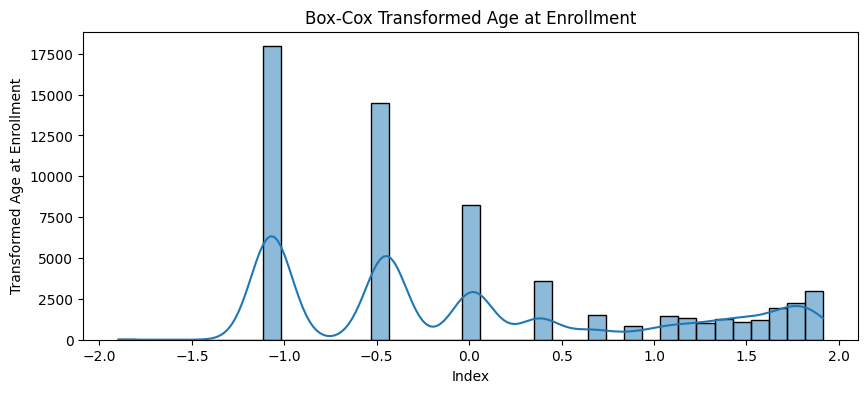

In [160]:
# Plot the transformed data
plt.figure(figsize=(10, 4))
sns.histplot(yeo_johnson_transformer['age_at_enrollment'], kde=True)
plt.title('Box-Cox Transformed Age at Enrollment')
plt.xlabel('Index')
plt.ylabel('Transformed Age at Enrollment')
plt.show()

### 4.14 curricular_units_1st_sem_(credited)

In [167]:
X_train['curricular_units_1st_sem_(credited)'].unique()

array([ 1,  0,  7,  4,  2,  3,  8,  5, 10, 11, 12,  6, 14,  9, 16, 15, 13,
       20, 19, 17, 18])